<a href="https://colab.research.google.com/github/Naveenpilli1996/projects/blob/main/CNN_Architecure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip Pred.zip

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,BatchNormalization,Dropout

In [5]:

train_path='/content/seg_train'
test_path='/content/seg_test'

In [6]:
train_datagen =ImageDataGenerator(rescale=1./255, validation_split=0.25)


In [7]:
train_generator = train_datagen.flow_from_directory(
        train_path,  # Source directory
        target_size=(150, 150),  # Resizes images
        batch_size=15,
        class_mode='categorical',subset = 'training')

Found 10528 images belonging to 6 classes.


In [8]:
validation_generator = train_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=15,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 748 images belonging to 6 classes.


In [48]:
def Classifier():
    model=Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128,(3,3),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    # model.add(Dropout(0.5))
    model.add(Dense(6,activation='softmax'))
    model.compile(loss='categorical_crossentropy',
    optimizer='Adam',metrics=['accuracy'])

    return model

Classifier=Classifier()

In [ ]:
Classifier.fit(train_generator,
          validation_data=validation_generator,
          steps_per_epoch=train_generator.samples/train_generator.batch_size,
          validation_steps=validation_generator.samples/validation_generator.batch_size,
          epochs=15)

In [15]:
Classifier.save("model.h5")

In [16]:
from tensorflow import keras
model = keras.models.load_model('/content/model.h5')

In [46]:
import cv2
import tensorflow as tf
import numpy as np


# img=cv2.imread('/content/seg_test/forest/20056.jpg')
test_image = tf.keras.preprocessing.image.load_img('/content/seg_pred/10100.jpg',target_size = (150, 150)) # IT IS LOADING STORED IMAGE FROM CAM_IMAGES FOLDER
test_image = tf.keras.preprocessing.image.img_to_array(test_image)  # IT IS CONVERTING IMAGE TO ARRAY FROMATE
test_image = np.expand_dims(test_image, axis = 0)  # IT IS EXPANDING DIMENTIONS OF IMAGE LIKE (1,224,224,3)

Predictions=model.predict(test_image)
Max_val=np.argmax(Predictions) # IT GIVES THE MAX_VALUE FROM PREDICTIONS
print(Max_val)

1/1 [==============================] - 0s 53ms/step
3


In [23]:
train_generator.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

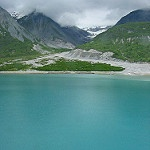

In [47]:
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/seg_train/glacier/10011.jpg')
cv2_imshow(img)